In [13]:
%load_ext autoreload
%autoreload 2


%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%cd C:\MAD4AG

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\MAD4AG


In [15]:
#filename = r'.\dbs\twins\run-evaluate.pkl'
filename = r'.\dbs\twins\run-evaluate_com.pkl'


df_twins=  pd.read_pickle(filename)

df_survey_twins = pd.read_pickle(f'./dbs/intermediate/df_survey_twins.pkl')

In [16]:
print('The share of the matched survey ppl: ', np.round(len(df_twins.sub_id.unique())/len(df_survey_twins.sub_id.unique()),2))

The share of the matched survey ppl:  0.95


In [17]:
print('Repetition number of 10 most matched people \n', df_twins.sub_id.value_counts().head(10))

Repetition number of 10 most matched people 
 20111541082    209
20114511092    199
20135141018    194
20130851013    191
20144841066    190
20142021076    190
20110511027    187
20111021098    186
20115211085    185
20111331001    185
Name: sub_id, dtype: int64


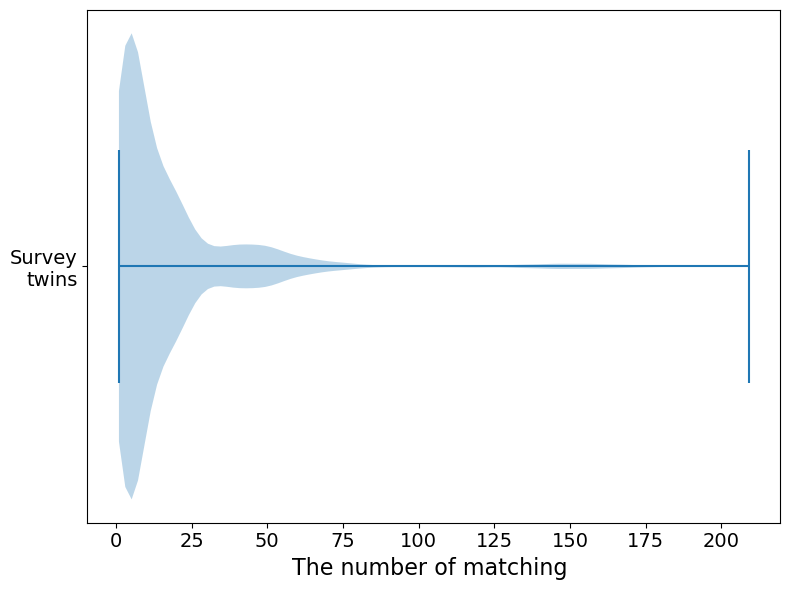

In [18]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize = (8, 6))


ax1.violinplot(df_twins.sub_id.value_counts(), vert=False)
#ax1.set_title('The number of matching ', fontsize=14)
ax1.set_yticks([1], labels=['Survey\ntwins'], fontsize=14)
ax1.set_xticks(range(0,225,25),range(0,225,25), fontsize=14)
# # #
# # ax1.set_xticklabels(range(-500, 2501, 500), fontsize=12)
# # ax1.set_ylabel('Urban density levels', fontsize=14)
ax1.set_xlabel('The number of matching ', fontsize=16)
# #
# fig.suptitle('The distance distribution between Home and Work/School' , fontsize=14)
fig.tight_layout()
plt.savefig("./figures/survey_ppl_repetition_number.png")
plt.show()

## Evaluation of act seq

In [19]:
seq_hist = df_survey_twins.act_seq_simp.value_counts(normalize=True).reset_index(name='share_survey').sort_values(by='share_survey', ascending=False)

mad_seq_hist= df_twins.groupby('act_seq_simp')['wt'].sum()/df_twins['wt'].sum()
mad_seq_hist= mad_seq_hist.reset_index(name='share_mad')
#aac['act_uniq']= aac['act_uniq'].astype(str)

seq_hist = pd.merge(seq_hist,mad_seq_hist, left_on='index', right_on='act_seq_simp')

seq_hist.drop(columns=['act_seq_simp'], inplace=True)

In [20]:
seq_hist['index']= seq_hist['index'].astype(str)

seq_hist['index']= seq_hist['index'].str.replace('Home','H')
seq_hist['index']= seq_hist['index'].str.replace('Work','W')
seq_hist['index']= seq_hist['index'].str.replace('Other','O')
seq_hist['index']= seq_hist['index'].str.replace('School','S')
seq_hist['index']= seq_hist['index'].str.replace(',','-')
seq_hist['index']= seq_hist['index'].str.replace('["\']','')
seq_hist['index']= seq_hist['index'].str.replace('(','')
seq_hist['index']= seq_hist['index'].str.replace(')','')
seq_hist['index']= seq_hist['index'].str.replace(' ','')

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':
C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


In [21]:
seq_hist

,index,share_survey,share_mad
0,H-O-H,0.220206,0.212384
1,H-W-H,0.217383,0.225163
2,H-O-H-O-H,0.059219,0.060450
3,H-O-O-H,0.057740,0.057880
4,H-W-O-H,0.051422,0.050726
...,...,...,...
497,H-O-O-H-O-O-O-H-O-W-H,0.000067,0.000065
498,H-W-H-O-O-O-H-O-H,0.000067,0.000077
499,H-O-O-O-H-W-H,0.000067,0.000091
500,H-O-O-H-W-O-O-H,0.000067,0.000065


In [22]:
from scipy.spatial import distance

print("Jensen-Shannon distance is a value between 0 and 1. A value of 0 indicates that the two distributions are identical, while a value closer to 1 indicates greater dissimilarity between the distributions.")
distance = np.round(distance.jensenshannon(seq_hist.iloc[:, 1], seq_hist.iloc[:, 2]),4)

print("Jensen-Shannon distance:", distance)


Jensen-Shannon distance is a value between 0 and 1. A value of 0 indicates that the two distributions are identical, while a value closer to 1 indicates greater dissimilarity between the distributions.
Jensen-Shannon distance: 0.0324


C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


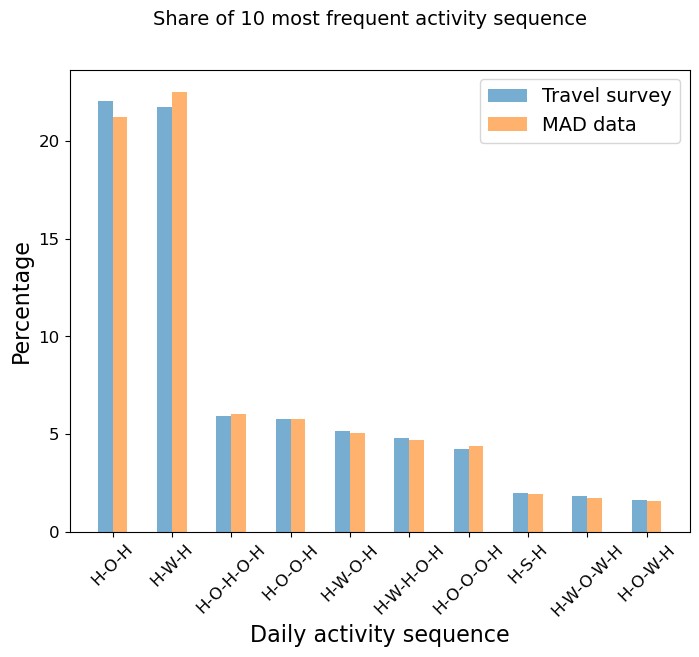

In [23]:
fig, (ax0) = plt.subplots(nrows=1, ncols=1, figsize = (8, 6))

X = np.arange(10)

ax0.bar(X- 0.125, seq_hist.iloc[:10, 1], width = 0.25, alpha=0.6, label='Travel survey')
ax0.bar(X+ 0.125, seq_hist.iloc[:10, 2], width = 0.25, alpha=0.6, label='MAD data')
# ax0.grid(visible=False)
#
ax0.legend( prop={'size': 14}, fontsize=14)
ax0.set_xlabel('Daily activity sequence', fontsize=16)
ax0.set_xticks(range(0,10),seq_hist.iloc[:10, 0], fontsize=12, rotation=45)
ax0.set_yticklabels(range(0, 25, 5), fontsize=12)
ax0.set_ylabel('Percentage', fontsize=16)


fig.suptitle('Share of 10 most frequent activity sequence' , fontsize=14)
#fig.tight_layout()
plt.savefig("./figures/most_frequent_activity_sequence.jpg")
#plt.show()


In [24]:
print('10 most frequent activity sequence contains %s percent of the data'%np.round(seq_hist.iloc[:10, 2].sum()*100,2))


10 most frequent activity sequence contains 74.96 percent of the data
